1. Постройте нейронную сеть (берем несложную полносвязную сеть, меняем число слоев, число нейронов, типы активации, тип оптимизатора) на датасете from sklearn.datasets import load_boston.

2. Постройте 10-15 вариантов разных нейронных сетей и сведите результаты их работы в таблицу. Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [1]:
import numpy as np
import pandas as pd

**Загрузка данных. Описание датасета.**

In [2]:
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)

In [3]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
FEATURES = load_boston()['feature_names']

In [5]:
df = pd.DataFrame(X, columns=FEATURES)

df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


**Создание отложенной выборки. Масштабирование данных.**

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
pd.DataFrame(X_train_scaled, columns=FEATURES).describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,0.042698,0.115211,0.394430,0.081794,0.347886,0.516330,0.667569,0.245054,0.370655,0.416378,0.625330,0.902680,0.309221
std,0.105382,0.234926,0.252029,0.274413,0.242438,0.131714,0.300814,0.194459,0.379763,0.323442,0.227812,0.225936,0.199873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000867,0.000000,0.175770,0.000000,0.128601,0.443380,0.415426,0.087738,0.130435,0.171756,0.510638,0.947615,0.149972
50%,0.002685,0.000000,0.338343,0.000000,0.314815,0.500287,0.778723,0.198956,0.173913,0.270992,0.691489,0.987745,0.282561
75%,0.041329,0.177500,0.646628,0.000000,0.491770,0.584403,0.936702,0.361825,1.000000,0.914122,0.808511,0.998285,0.425083
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
pd.DataFrame(X_test_scaled, columns=FEATURES).describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,0.034115,0.108937,0.382268,0.031496,0.352988,0.538399,0.660085,0.234406,0.374872,0.439608,0.615765,0.886296,0.278096
std,0.063952,0.228922,0.250601,0.175346,0.226940,0.142225,0.296476,0.182822,0.376490,0.316808,0.238399,0.243011,0.187198
min,0.000052,0.000000,0.028959,0.000000,0.008230,0.110558,-0.032979,0.004410,0.000000,0.011450,0.042553,0.008397,0.005243
25%,0.000794,0.000000,0.155792,0.000000,0.158436,0.467235,0.413830,0.088407,0.130435,0.192748,0.457447,0.935322,0.135210
50%,0.003183,0.000000,0.296921,0.000000,0.314815,0.527112,0.715957,0.160327,0.173913,0.349237,0.670213,0.982500,0.239238
75%,0.037033,0.000000,0.646628,0.000000,0.491770,0.588044,0.935638,0.379948,1.000000,0.914122,0.808511,0.998374,0.381071
max,0.423240,0.950000,1.000000,1.000000,1.000000,0.989462,1.000000,0.871218,1.000000,1.000000,0.914894,1.000000,0.802428


Будем строить модели в цикле со всеми возможными гиперпараметрами, из заданного диапазона. По 100 случайных моделей заданной глубины, от 0 до 9 (количество скрытых слоев). Результаты выведем в таблицу, затем проведем анализ.

In [11]:
import tensorflow as tf

gpu_device = tf.config.experimental.list_physical_devices('GPU')
if gpu_device:
    tf.config.experimental.set_memory_growth(gpu_device[0], True)

In [12]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [13]:
def r2_metric(y_true, y_pred):
    '''
    Функция для расчета метрики R-square (коэффициент детерминации).
    
    y_true (tf.Tensor, np.array) - истинные значения;
    y_pred (tf.Tensor, np.array) - предсказанные значения (форма должна быть равна форме y_true).
    
    Возвращает tf.Tensor - рассчитанный коэффициент детерминации.
    '''
#     assert y_true.shape == y_pred.shape
    residual = tf.reduce_sum((y_true - y_pred)**2)
    total = tf.reduce_sum((y_true - tf.reduce_mean(y_true))**2)
    return 1. - (residual / total)

In [14]:
from sklearn.metrics import r2_score

target = np.random.random(10)
preds = np.random.random(10)

print(r2_score(target, preds))
print(r2_metric(target, preds))

-1.5712083219446025
tf.Tensor(-1.5712083219446025, shape=(), dtype=float64)


In [15]:
from itertools import product, combinations_with_replacement, combinations

In [16]:
def build_model(params, input_shape):
    n_neurons, hidden_activation, output_activation, opt, loss = params

    tf.random.set_seed(1)
    inputs = Input(shape=input_shape)
    l = inputs
    for n in n_neurons:
        l = Dense(n, activation=hidden_activation)(l)
    outputs = Dense(1, activation=output_activation)(l)
    model = Model(inputs, outputs)
    model.compile(optimizer=opt, loss=loss, metrics=[r2_metric])
    return model

In [17]:
from math import factorial

def comb_repl(n, k):
    '''
    Функция рассчитывает количество сочетаний из k элементов из множества n, с повторениями.
    '''
    return int(factorial(n + k - 1)/(factorial(k) * factorial(n - 1))) 

In [18]:
def gen_choices(gen_obj, indices):
    '''
    Функция-генератор, возвращает элементы с индексами из переданного массива
    '''
    for i, el in enumerate(gen_obj):
        if i in indices:
            yield el

In [19]:
%%time
num_layers = list(range(10))
n_neurons = 2 ** np.arange(4, 9)
act_f = ['linear', 'relu', 'elu']
losses = ['mae', 'mse', 'mape']
optimizers = ['SGD', 'RMSprop', 'adam']

results = []

for num in num_layers:
    # использование генераторов, чтобы не было затратно по памяти на большом количестве слоев
    # все возможные сочетания параметров слоев с повторениями
    layers = combinations_with_replacement(n_neurons, num)
    # все возможные параметры для нейронной сети 
    # (параметры слоев, ф-ция активации на последнем слое, оптимизатор, ф-ция потерь)
    parameters = product(layers, act_f, act_f, optimizers, losses)
    # расчет длины
    parameters_len = comb_repl(len(n_neurons), num) * (len(act_f)**2) * len(optimizers) * len(losses)
    # выбор 100 случайных индексов
    indices = np.random.randint(parameters_len, size=100)
    
    for params in gen_choices(parameters, indices):
        
        model = build_model(params, 13)
        
        # обучение на 100 эпохах
        history = model.fit(X_train_scaled, 
                            y_train, 
                            epochs=100, 
                            verbose=0, 
                            validation_data=(X_test_scaled, y_test))
        
        best_epoch = np.argmax(history.history['val_r2_metric']) + 1
        best_score = round(np.max(history.history['val_r2_metric']), 4)
        
        print(f'\nПараметры модели \
        \n{params} \
        \nЛучшая метрика (r2): {best_score}, \
        \nКоличество эпох: {best_epoch}')
        
        model_result = [num] + list(params)
        
        model_result.append(model.count_params())
        model_result.append(best_epoch)
        model_result.append(best_score)
        
        results.append(model_result)


Параметры модели         
((), 'linear', 'linear', 'SGD', 'mae')         
Лучшая метрика (r2): -0.1702,         
Количество эпох: 100

Параметры модели         
((), 'linear', 'linear', 'SGD', 'mse')         
Лучшая метрика (r2): 0.6321,         
Количество эпох: 100

Параметры модели         
((), 'linear', 'linear', 'SGD', 'mape')         
Лучшая метрика (r2): 0.2162,         
Количество эпох: 100

Параметры модели         
((), 'linear', 'linear', 'RMSprop', 'mae')         
Лучшая метрика (r2): -2.602,         
Количество эпох: 100

Параметры модели         
((), 'linear', 'linear', 'RMSprop', 'mse')         
Лучшая метрика (r2): -2.6139,         
Количество эпох: 100

Параметры модели         
((), 'linear', 'linear', 'RMSprop', 'mape')         
Лучшая метрика (r2): -2.6292,         
Количество эпох: 100

Параметры модели         
((), 'linear', 'linear', 'adam', 'mae')         
Лучшая метрика (r2): -2.6633,         
Количество эпох: 100

Параметры модели         
((), 'linear', '


Параметры модели         
((16,), 'relu', 'linear', 'SGD', 'mae')         
Лучшая метрика (r2): 0.6259,         
Количество эпох: 100

Параметры модели         
((16,), 'relu', 'relu', 'SGD', 'mae')         
Лучшая метрика (r2): 0.6274,         
Количество эпох: 100

Параметры модели         
((16,), 'relu', 'relu', 'SGD', 'mse')         
Лучшая метрика (r2): 0.8948,         
Количество эпох: 96

Параметры модели         
((16,), 'relu', 'relu', 'adam', 'mse')         
Лучшая метрика (r2): 0.2448,         
Количество эпох: 100

Параметры модели         
((16,), 'relu', 'elu', 'adam', 'mae')         
Лучшая метрика (r2): 0.2529,         
Количество эпох: 100

Параметры модели         
((16,), 'elu', 'linear', 'SGD', 'mae')         
Лучшая метрика (r2): 0.6112,         
Количество эпох: 94

Параметры модели         
((16,), 'elu', 'linear', 'SGD', 'mse')         
Лучшая метрика (r2): 0.8848,         
Количество эпох: 95

Параметры модели         
((16,), 'elu', 'linear', 'RMSprop', 'mse


Параметры модели         
((128,), 'elu', 'linear', 'RMSprop', 'mape')         
Лучшая метрика (r2): 0.619,         
Количество эпох: 94

Параметры модели         
((128,), 'elu', 'relu', 'SGD', 'mae')         
Лучшая метрика (r2): 0.6326,         
Количество эпох: 94

Параметры модели         
((128,), 'elu', 'relu', 'SGD', 'mape')         
Лучшая метрика (r2): 0.7176,         
Количество эпох: 88

Параметры модели         
((128,), 'elu', 'elu', 'SGD', 'mse')         
Лучшая метрика (r2): 0.8537,         
Количество эпох: 95

Параметры модели         
((128,), 'elu', 'elu', 'adam', 'mse')         
Лучшая метрика (r2): 0.6807,         
Количество эпох: 100

Параметры модели         
((256,), 'linear', 'linear', 'RMSprop', 'mae')         
Лучшая метрика (r2): 0.7758,         
Количество эпох: 94

Параметры модели         
((256,), 'linear', 'linear', 'RMSprop', 'mape')         
Лучшая метрика (r2): 0.714,         
Количество эпох: 94

Параметры модели         
((256,), 'linear', 'relu


Параметры модели         
((32, 32), 'relu', 'relu', 'adam', 'mse')         
Лучшая метрика (r2): 0.839,         
Количество эпох: 100

Параметры модели         
((32, 32), 'relu', 'elu', 'adam', 'mse')         
Лучшая метрика (r2): 0.8368,         
Количество эпох: 100

Параметры модели         
((32, 32), 'elu', 'linear', 'SGD', 'mape')         
Лучшая метрика (r2): 0.821,         
Количество эпох: 100

Параметры модели         
((32, 32), 'elu', 'relu', 'RMSprop', 'mape')         
Лучшая метрика (r2): 0.6113,         
Количество эпох: 94

Параметры модели         
((32, 64), 'linear', 'linear', 'RMSprop', 'mse')         
Лучшая метрика (r2): 0.7855,         
Количество эпох: 100

Параметры модели         
((32, 64), 'linear', 'linear', 'adam', 'mse')         
Лучшая метрика (r2): 0.7771,         
Количество эпох: 98

Параметры модели         
((32, 64), 'linear', 'elu', 'RMSprop', 'mae')         
Лучшая метрика (r2): 0.7779,         
Количество эпох: 94

Параметры модели         
(


Параметры модели         
((256, 256), 'elu', 'linear', 'adam', 'mae')         
Лучшая метрика (r2): 0.8502,         
Количество эпох: 99

Параметры модели         
((256, 256), 'elu', 'relu', 'SGD', 'mae')         
Лучшая метрика (r2): 0.7774,         
Количество эпох: 94

Параметры модели         
((256, 256), 'elu', 'relu', 'adam', 'mape')         
Лучшая метрика (r2): 0.7924,         
Количество эпох: 94

Параметры модели         
((16, 16, 16), 'linear', 'relu', 'adam', 'mse')         
Лучшая метрика (r2): 0.795,         
Количество эпох: 100

Параметры модели         
((16, 16, 16), 'relu', 'linear', 'RMSprop', 'mae')         
Лучшая метрика (r2): 0.8073,         
Количество эпох: 94

Параметры модели         
((16, 16, 16), 'relu', 'linear', 'RMSprop', 'mape')         
Лучшая метрика (r2): 0.7384,         
Количество эпох: 94

Параметры модели         
((16, 16, 16), 'relu', 'relu', 'RMSprop', 'mape')         
Лучшая метрика (r2): 0.7367,         
Количество эпох: 94

Параметры


Параметры модели         
((32, 32, 256), 'elu', 'linear', 'SGD', 'mse')         
Лучшая метрика (r2): 0.9039,         
Количество эпох: 93

Параметры модели         
((32, 32, 256), 'elu', 'linear', 'adam', 'mae')         
Лучшая метрика (r2): 0.7966,         
Количество эпох: 95

Параметры модели         
((32, 64, 64), 'linear', 'linear', 'RMSprop', 'mse')         
Лучшая метрика (r2): 0.795,         
Количество эпох: 92

Параметры модели         
((32, 64, 64), 'linear', 'linear', 'adam', 'mape')         
Лучшая метрика (r2): 0.7256,         
Количество эпох: 64

Параметры модели         
((32, 64, 64), 'linear', 'elu', 'RMSprop', 'mae')         
Лучшая метрика (r2): 0.7879,         
Количество эпох: 94

Параметры модели         
((32, 64, 128), 'linear', 'linear', 'SGD', 'mse')         
Лучшая метрика (r2): nan,         
Количество эпох: 1

Параметры модели         
((32, 64, 128), 'elu', 'linear', 'RMSprop', 'mse')         
Лучшая метрика (r2): 0.8492,         
Количество эпох: 


Параметры модели         
((16, 16, 64, 128), 'elu', 'elu', 'SGD', 'mse')         
Лучшая метрика (r2): 0.0147,         
Количество эпох: 1

Параметры модели         
((16, 16, 64, 256), 'linear', 'relu', 'SGD', 'mse')         
Лучшая метрика (r2): -5.7439,         
Количество эпох: 1

Параметры модели         
((16, 16, 64, 256), 'relu', 'relu', 'RMSprop', 'mse')         
Лучшая метрика (r2): 0.9181,         
Количество эпох: 96

Параметры модели         
((16, 16, 64, 256), 'relu', 'relu', 'adam', 'mae')         
Лучшая метрика (r2): 0.8826,         
Количество эпох: 100

Параметры модели         
((16, 16, 128, 128), 'linear', 'elu', 'SGD', 'mse')         
Лучшая метрика (r2): -6.2516,         
Количество эпох: 1

Параметры модели         
((16, 16, 128, 128), 'elu', 'elu', 'RMSprop', 'mae')         
Лучшая метрика (r2): 0.8074,         
Количество эпох: 100

Параметры модели         
((16, 16, 128, 256), 'linear', 'elu', 'RMSprop', 'mae')         
Лучшая метрика (r2): 0.7872,     


Параметры модели         
((32, 64, 256, 256), 'elu', 'relu', 'RMSprop', 'mape')         
Лучшая метрика (r2): 0.801,         
Количество эпох: 98

Параметры модели         
((32, 128, 128, 128), 'linear', 'elu', 'RMSprop', 'mae')         
Лучшая метрика (r2): 0.791,         
Количество эпох: 32

Параметры модели         
((32, 128, 128, 128), 'linear', 'elu', 'adam', 'mse')         
Лучшая метрика (r2): 0.8012,         
Количество эпох: 37

Параметры модели         
((32, 128, 128, 128), 'relu', 'relu', 'adam', 'mse')         
Лучшая метрика (r2): 0.9125,         
Количество эпох: 100

Параметры модели         
((32, 128, 128, 128), 'elu', 'linear', 'SGD', 'mae')         
Лучшая метрика (r2): 0.7993,         
Количество эпох: 98

Параметры модели         
((32, 128, 128, 256), 'elu', 'elu', 'adam', 'mape')         
Лучшая метрика (r2): 0.8438,         
Количество эпох: 94

Параметры модели         
((32, 128, 256, 256), 'linear', 'linear', 'RMSprop', 'mae')         
Лучшая метрика (r


Параметры модели         
((16, 32, 32, 32, 32), 'linear', 'elu', 'RMSprop', 'mae')         
Лучшая метрика (r2): 0.7862,         
Количество эпох: 85

Параметры модели         
((16, 32, 32, 64, 128), 'relu', 'relu', 'RMSprop', 'mae')         
Лучшая метрика (r2): -5.7439,         
Количество эпох: 1

Параметры модели         
((16, 32, 32, 64, 128), 'elu', 'elu', 'RMSprop', 'mae')         
Лучшая метрика (r2): 0.8397,         
Количество эпох: 95

Параметры модели         
((16, 32, 64, 64, 128), 'relu', 'relu', 'adam', 'mape')         
Лучшая метрика (r2): 0.8823,         
Количество эпох: 94

Параметры модели         
((16, 32, 64, 64, 256), 'relu', 'relu', 'SGD', 'mape')         
Лучшая метрика (r2): 0.8714,         
Количество эпох: 88

Параметры модели         
((16, 32, 64, 64, 256), 'elu', 'linear', 'RMSprop', 'mse')         
Лучшая метрика (r2): 0.8812,         
Количество эпох: 95

Параметры модели         
((16, 32, 64, 128, 128), 'linear', 'elu', 'RMSprop', 'mape')       


Параметры модели         
((32, 256, 256, 256, 256), 'linear', 'relu', 'adam', 'mae')         
Лучшая метрика (r2): 0.798,         
Количество эпох: 28

Параметры модели         
((32, 256, 256, 256, 256), 'elu', 'relu', 'adam', 'mse')         
Лучшая метрика (r2): 0.9147,         
Количество эпох: 99

Параметры модели         
((64, 64, 64, 64, 64), 'linear', 'linear', 'RMSprop', 'mse')         
Лучшая метрика (r2): 0.795,         
Количество эпох: 35

Параметры модели         
((64, 64, 64, 64, 256), 'elu', 'elu', 'SGD', 'mape')         
Лучшая метрика (r2): 0.8696,         
Количество эпох: 80

Параметры модели         
((64, 64, 128, 128, 128), 'relu', 'elu', 'RMSprop', 'mse')         
Лучшая метрика (r2): 0.9284,         
Количество эпох: 96

Параметры модели         
((64, 64, 128, 128, 256), 'elu', 'elu', 'SGD', 'mse')         
Лучшая метрика (r2): -6.2516,         
Количество эпох: 1

Параметры модели         
((64, 64, 128, 256, 256), 'relu', 'linear', 'adam', 'mse')         


Параметры модели         
((16, 32, 32, 64, 64, 64), 'relu', 'elu', 'SGD', 'mape')         
Лучшая метрика (r2): 0.8521,         
Количество эпох: 93

Параметры модели         
((16, 32, 32, 64, 64, 128), 'relu', 'elu', 'RMSprop', 'mse')         
Лучшая метрика (r2): 0.9116,         
Количество эпох: 96

Параметры модели         
((16, 32, 32, 64, 256, 256), 'linear', 'elu', 'SGD', 'mape')         
Лучшая метрика (r2): 0.7264,         
Количество эпох: 86

Параметры модели         
((16, 32, 32, 128, 256, 256), 'relu', 'linear', 'SGD', 'mape')         
Лучшая метрика (r2): 0.8481,         
Количество эпох: 93

Параметры модели         
((16, 32, 64, 64, 64, 64), 'elu', 'linear', 'RMSprop', 'mape')         
Лучшая метрика (r2): 0.8032,         
Количество эпох: 100

Параметры модели         
((16, 32, 64, 64, 64, 128), 'relu', 'linear', 'adam', 'mse')         
Лучшая метрика (r2): 0.9167,         
Количество эпох: 96

Параметры модели         
((16, 32, 64, 64, 64, 128), 'relu', 'relu'


Параметры модели         
((32, 128, 128, 128, 256, 256), 'relu', 'linear', 'SGD', 'mae')         
Лучшая метрика (r2): 0.8722,         
Количество эпох: 100

Параметры модели         
((32, 128, 128, 256, 256, 256), 'relu', 'linear', 'adam', 'mae')         
Лучшая метрика (r2): 0.916,         
Количество эпох: 89

Параметры модели         
((32, 128, 256, 256, 256, 256), 'elu', 'linear', 'RMSprop', 'mae')         
Лучшая метрика (r2): 0.8726,         
Количество эпох: 79

Параметры модели         
((32, 256, 256, 256, 256, 256), 'linear', 'elu', 'adam', 'mse')         
Лучшая метрика (r2): 0.8031,         
Количество эпох: 20

Параметры модели         
((32, 256, 256, 256, 256, 256), 'relu', 'relu', 'adam', 'mae')         
Лучшая метрика (r2): -5.7439,         
Количество эпох: 1

Параметры модели         
((64, 64, 64, 64, 64, 64), 'linear', 'relu', 'RMSprop', 'mape')         
Лучшая метрика (r2): 0.7634,         
Количество эпох: 63

Параметры модели         
((64, 64, 128, 128, 12


Параметры модели         
((16, 32, 32, 32, 64, 64, 256), 'relu', 'relu', 'SGD', 'mape')         
Лучшая метрика (r2): 0.8368,         
Количество эпох: 91

Параметры модели         
((16, 32, 32, 32, 128, 128, 128), 'linear', 'relu', 'SGD', 'mae')         
Лучшая метрика (r2): 0.7551,         
Количество эпох: 93

Параметры модели         
((16, 32, 32, 32, 256, 256, 256), 'elu', 'elu', 'RMSprop', 'mape')         
Лучшая метрика (r2): 0.7805,         
Количество эпох: 100

Параметры модели         
((16, 32, 32, 64, 64, 64, 256), 'linear', 'elu', 'RMSprop', 'mape')         
Лучшая метрика (r2): 0.7308,         
Количество эпох: 82

Параметры модели         
((16, 32, 32, 64, 64, 128, 256), 'linear', 'relu', 'SGD', 'mae')         
Лучшая метрика (r2): -5.7439,         
Количество эпох: 1

Параметры модели         
((16, 32, 32, 64, 64, 256, 256), 'elu', 'linear', 'adam', 'mse')         
Лучшая метрика (r2): 0.8954,         
Количество эпох: 100

Параметры модели         
((16, 32, 32,


Параметры модели         
((64, 64, 64, 128, 256, 256, 256), 'relu', 'relu', 'RMSprop', 'mae')         
Лучшая метрика (r2): 0.9248,         
Количество эпох: 80

Параметры модели         
((64, 64, 64, 128, 256, 256, 256), 'relu', 'elu', 'SGD', 'mse')         
Лучшая метрика (r2): -0.2268,         
Количество эпох: 1

Параметры модели         
((64, 64, 128, 128, 128, 256, 256), 'relu', 'linear', 'adam', 'mape')         
Лучшая метрика (r2): 0.8966,         
Количество эпох: 99

Параметры модели         
((64, 128, 128, 128, 256, 256, 256), 'linear', 'elu', 'adam', 'mae')         
Лучшая метрика (r2): 0.7994,         
Количество эпох: 79

Параметры модели         
((64, 128, 128, 128, 256, 256, 256), 'relu', 'linear', 'adam', 'mape')         
Лучшая метрика (r2): 0.9247,         
Количество эпох: 96

Параметры модели         
((128, 128, 128, 128, 256, 256, 256), 'linear', 'elu', 'RMSprop', 'mape')         
Лучшая метрика (r2): 0.7409,         
Количество эпох: 73

Параметры модели  


Параметры модели         
((16, 16, 128, 128, 256, 256, 256, 256), 'relu', 'elu', 'adam', 'mae')         
Лучшая метрика (r2): 0.9016,         
Количество эпох: 89

Параметры модели         
((16, 32, 32, 32, 32, 32, 32, 64), 'relu', 'relu', 'adam', 'mse')         
Лучшая метрика (r2): 0.9096,         
Количество эпох: 90

Параметры модели         
((16, 32, 32, 32, 32, 32, 64, 256), 'relu', 'linear', 'SGD', 'mse')         
Лучшая метрика (r2): nan,         
Количество эпох: 1

Параметры модели         
((16, 32, 32, 32, 32, 32, 256, 256), 'linear', 'relu', 'adam', 'mape')         
Лучшая метрика (r2): 0.7278,         
Количество эпох: 38

Параметры модели         
((16, 32, 32, 32, 32, 64, 64, 64), 'linear', 'relu', 'adam', 'mae')         
Лучшая метрика (r2): 0.7866,         
Количество эпох: 79

Параметры модели         
((16, 32, 32, 32, 32, 128, 128, 256), 'linear', 'elu', 'adam', 'mse')         
Лучшая метрика (r2): 0.7901,         
Количество эпох: 38

Параметры модели         


Параметры модели         
((64, 64, 128, 128, 128, 128, 128, 128), 'elu', 'relu', 'SGD', 'mape')         
Лучшая метрика (r2): 0.8484,         
Количество эпох: 73

Параметры модели         
((64, 64, 128, 128, 128, 128, 256, 256), 'relu', 'relu', 'SGD', 'mape')         
Лучшая метрика (r2): 0.8445,         
Количество эпох: 100

Параметры модели         
((64, 64, 128, 128, 128, 256, 256, 256), 'relu', 'relu', 'RMSprop', 'mae')         
Лучшая метрика (r2): 0.9237,         
Количество эпох: 92

Параметры модели         
((64, 64, 128, 128, 256, 256, 256, 256), 'linear', 'linear', 'adam', 'mae')         
Лучшая метрика (r2): 0.7949,         
Количество эпох: 13

Параметры модели         
((64, 128, 128, 128, 128, 128, 128, 256), 'linear', 'relu', 'adam', 'mape')         
Лучшая метрика (r2): 0.7529,         
Количество эпох: 24

Параметры модели         
((128, 128, 128, 128, 128, 256, 256, 256), 'relu', 'relu', 'adam', 'mape')         
Лучшая метрика (r2): 0.8836,         
Количество


Параметры модели         
((16, 32, 32, 32, 32, 32, 128, 256, 256), 'relu', 'linear', 'SGD', 'mse')         
Лучшая метрика (r2): nan,         
Количество эпох: 1

Параметры модели         
((16, 32, 32, 32, 32, 32, 256, 256, 256), 'linear', 'relu', 'adam', 'mape')         
Лучшая метрика (r2): 0.7235,         
Количество эпох: 34

Параметры модели         
((16, 32, 32, 32, 32, 64, 64, 256, 256), 'relu', 'linear', 'SGD', 'mape')         
Лучшая метрика (r2): 0.6371,         
Количество эпох: 94

Параметры модели         
((16, 32, 32, 32, 32, 64, 128, 128, 256), 'linear', 'relu', 'SGD', 'mae')         
Лучшая метрика (r2): 0.764,         
Количество эпох: 82

Параметры модели         
((16, 32, 32, 32, 64, 64, 64, 128, 128), 'linear', 'linear', 'SGD', 'mae')         
Лучшая метрика (r2): 0.7683,         
Количество эпох: 93

Параметры модели         
((16, 32, 32, 32, 64, 64, 128, 128, 256), 'linear', 'elu', 'RMSprop', 'mae')         
Лучшая метрика (r2): 0.7729,         
Количество 


Параметры модели         
((32, 64, 128, 128, 128, 128, 128, 128, 256), 'elu', 'relu', 'RMSprop', 'mae')         
Лучшая метрика (r2): 0.8793,         
Количество эпох: 73

Параметры модели         
((32, 128, 128, 128, 128, 128, 256, 256, 256), 'linear', 'linear', 'RMSprop', 'mse')         
Лучшая метрика (r2): 0.7802,         
Количество эпох: 89

Параметры модели         
((64, 64, 64, 64, 64, 64, 64, 64, 128), 'linear', 'relu', 'RMSprop', 'mse')         
Лучшая метрика (r2): 0.8013,         
Количество эпох: 57

Параметры модели         
((64, 64, 64, 64, 64, 64, 64, 64, 256), 'linear', 'linear', 'SGD', 'mape')         
Лучшая метрика (r2): nan,         
Количество эпох: 1

Параметры модели         
((64, 64, 64, 64, 64, 64, 64, 256, 256), 'relu', 'elu', 'SGD', 'mse')         
Лучшая метрика (r2): -6.2516,         
Количество эпох: 1

Параметры модели         
((64, 64, 64, 64, 64, 64, 256, 256, 256), 'elu', 'elu', 'SGD', 'mae')         
Лучшая метрика (r2): 0.8631,         
Колич

In [102]:
columns = [
    'NumLayers', 
    'ParamLayers', 
    'HiddenActivation', 
    'OutputActivation', 
    'Optimizer', 
    'Loss', 
    'TotalParams', 
    'BestEpoch', 
    'BestScore'
]

results_df = pd.DataFrame(results, columns=columns)
results_df

,NumLayers,ParamLayers,HiddenActivation,OutputActivation,Optimizer,Loss,TotalParams,BestEpoch,BestScore
0,0,(),linear,linear,SGD,mae,14,100,-0.1702
1,0,(),linear,linear,SGD,mse,14,100,0.6321
2,0,(),linear,linear,SGD,mape,14,100,0.2162
3,0,(),linear,linear,RMSprop,mae,14,100,-2.6020
4,0,(),linear,linear,RMSprop,mse,14,100,-2.6139
...,...,...,...,...,...,...,...,...,...
938,9,"(64, 64, 64, 64, 64, 64, 64, 256, 256)",relu,elu,SGD,mse,108545,1,-6.2516
939,9,"(64, 64, 64, 64, 64, 64, 256, 256, 256)",elu,elu,SGD,mae,170177,97,0.8631
940,9,"(64, 128, 128, 128, 256, 256, 256, 256, 256)",elu,linear,adam,mape,338689,99,0.8668
941,9,"(128, 128, 128, 128, 128, 128, 128, 256, 256)",relu,elu,RMSprop,mape,199937,100,0.8834


In [103]:
results_df.to_csv('results.csv', index=False)

In [104]:
results_df = pd.read_csv('results.csv')

In [105]:
results_df[results_df['BestScore'].isnull()]

,NumLayers,ParamLayers,HiddenActivation,OutputActivation,Optimizer,Loss,TotalParams,BestEpoch,BestScore
267,3,"(16, 32, 128)",linear,linear,SGD,mse,5121,1,NaN
276,3,"(16, 64, 256)",linear,linear,SGD,mse,18209,1,NaN
307,3,"(32, 64, 128)",linear,linear,SGD,mse,11009,1,NaN
310,3,"(32, 64, 256)",elu,linear,SGD,mse,19457,1,NaN
466,5,"(16, 16, 64, 64, 128)",elu,linear,SGD,mse,14193,1,NaN
468,5,"(16, 16, 64, 128, 256)",linear,elu,SGD,mse,43185,1,NaN
498,5,"(16, 128, 256, 256, 256)",relu,linear,SGD,mse,167265,1,NaN
622,6,"(32, 32, 128, 128, 128, 128)",elu,linear,SGD,mse,55393,1,NaN
645,7,"(16, 16, 16, 16, 16, 32, 128)",linear,linear,SGD,mse,6209,1,NaN
675,7,"(16, 16, 64, 64, 256, 256, 256)",linear,linear,SGD,mape,154225,1,NaN


In [106]:
# заменим NaN значения ("взрыв градиента") на -1
results_df['BestScore'].fillna(-1, inplace=True)

In [107]:
# ограничение значений
results_df['BestScore'] = results_df['BestScore'].clip(-1, 1)

In [108]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [109]:
def show_pointplot(x, y, data, figsize=(16, 8)):
    plt.figure(figsize=figsize)
    
    sns.pointplot(x=x, y=y, data=data, capsize=.1)
    plt.xticks(rotation=70)

    plt.title(f'Confidence intervals (95 %) for {y}')
    plt.show()

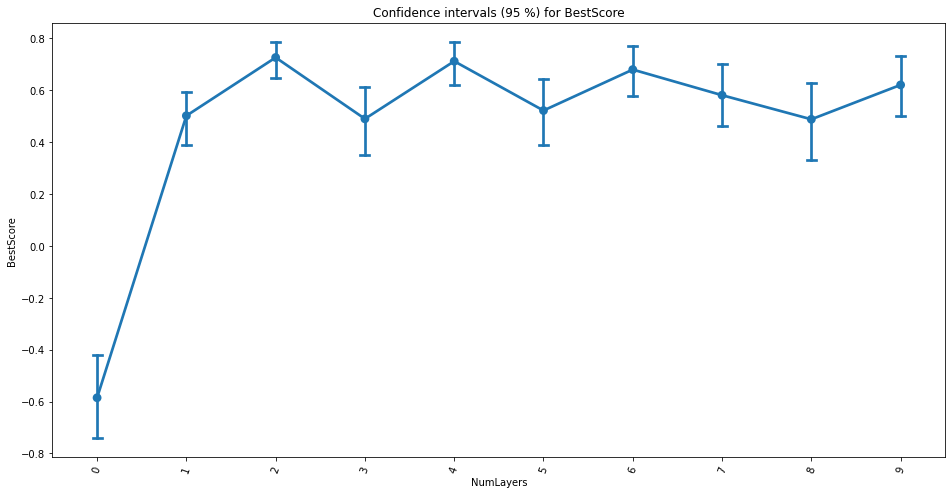

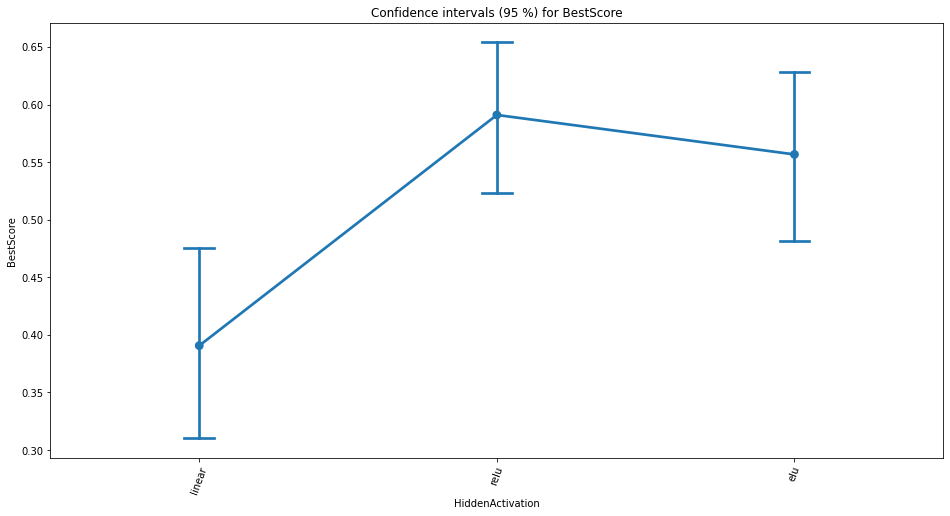

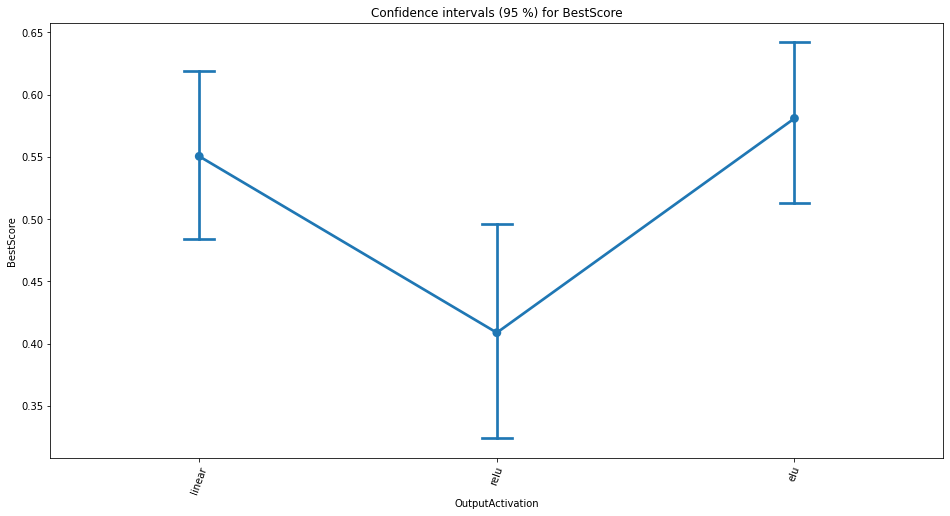

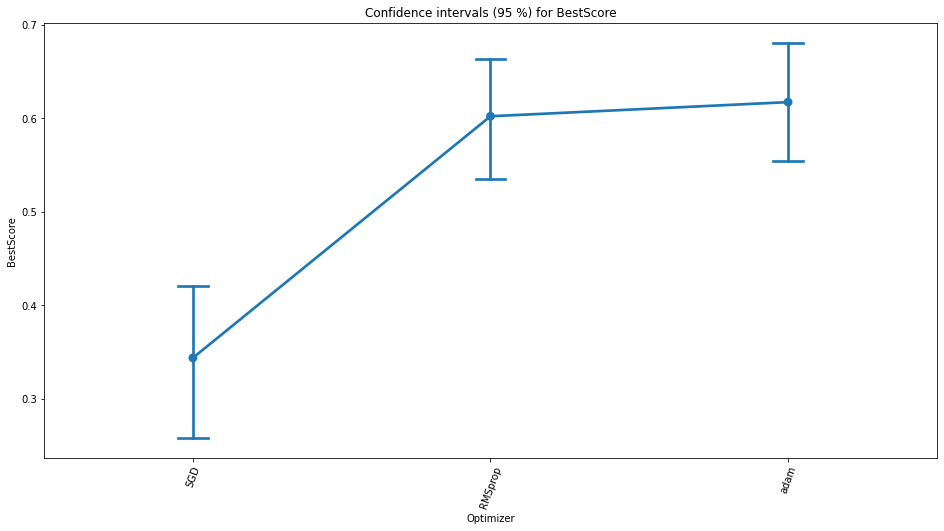

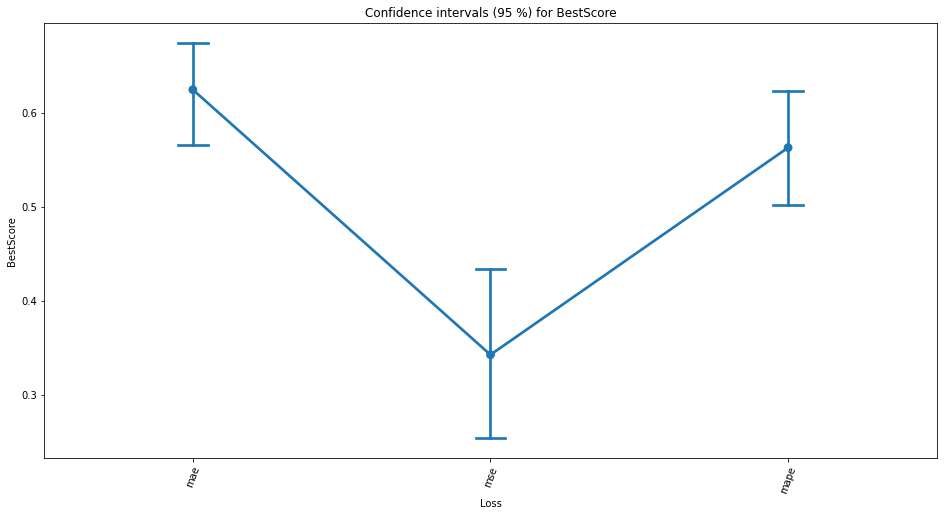

In [110]:
categorical = ['NumLayers', 'HiddenActivation', 'OutputActivation', 'Optimizer', 'Loss']

for cat in categorical:
    show_pointplot(cat, 'BestScore', results_df)

При использовании SGD в качестве оптимизатора - похоже, что метрика в среднем ниже. 

Также похоже, что метрика ниже при использовании ф-ции потерь mse. 

Сформулируем гипотезу.

**Гипотеза** 
* Нулевая гипотеза: средние значения метрики **не имеют** статистически значимых различий; 
* Альтернативная гипотеза: средние значения метрики **имеют** статистически значимые различия;
* Критерий: критерий Манна-Уитни
* Уровень значимости $\alpha$: 0.05
* Критическая область: двухсторонняя


MannwhitneyuResult(statistic=73708.5, pvalue=2.811093011818968e-12)


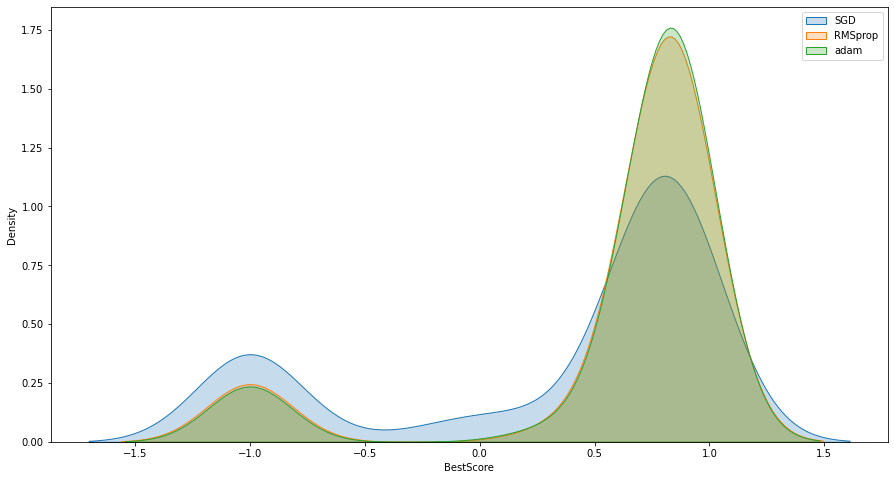

In [111]:
plt.figure(figsize=(15, 8))
for opt in optimizers:
    sns.kdeplot(results_df[results_df['Optimizer'] == opt]['BestScore'], shade=True, label=opt)
    
print(
    mannwhitneyu(
        results_df[results_df['Optimizer'] == 'SGD']['BestScore'], 
        results_df[results_df['Optimizer'] != 'SGD']['BestScore']
    )
)
plt.legend()
plt.show()

При использовании SGD в качестве оптимизатора, получаются более низкие значения метрики.

**По оптимизатору отклоняем нулевую гипотезу.**

Вероятнее всего это объясняется тем, что с данным оптимизатором чаще случается "паралич сети" и "взрыв градиента" (отрицательные значения метрики).

MannwhitneyuResult(statistic=89656.0, pvalue=0.05774021529499034)


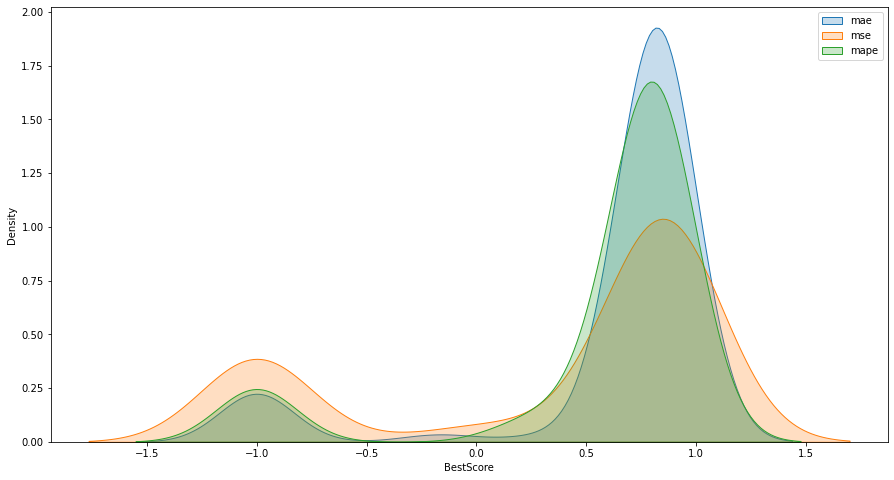

In [112]:
plt.figure(figsize=(15, 8))
for loss in losses:
    sns.kdeplot(results_df[results_df['Loss'] == loss]['BestScore'], shade=True, label=loss)
    
print(
    mannwhitneyu(
        results_df[results_df['Loss'] == 'mse']['BestScore'], 
        results_df[results_df['Loss'] != 'mse']['BestScore']
    )
)
plt.legend()
plt.show()

Различия при использовании ф-ции потерь "mse" не являются статистически значимыми.

**По функции потерь отклоняем альтернативную гипотезу.**

Попробуем добавить новые признаки, конкатенируя имеющиеся признаки между собой. Чтобы выявить - какие сочетания гиперпараметров являются наиболее удачными.

In [113]:
new_features = []

for cols in combinations(categorical, 2):
    feature_name = '_'.join(cols)
    new_features.append(feature_name)
    results_df[feature_name] = results_df[list(cols)].apply(lambda x: '_'.join(x.astype(str)), axis=1)

In [114]:
pd.set_option('display.max_columns', None)
results_df.head(5)

,NumLayers,ParamLayers,HiddenActivation,OutputActivation,Optimizer,Loss,TotalParams,BestEpoch,BestScore,NumLayers_HiddenActivation,NumLayers_OutputActivation,NumLayers_Optimizer,NumLayers_Loss,HiddenActivation_OutputActivation,HiddenActivation_Optimizer,HiddenActivation_Loss,OutputActivation_Optimizer,OutputActivation_Loss,Optimizer_Loss
0,0,(),linear,linear,SGD,mae,14,100,-0.1702,0_linear,0_linear,0_SGD,0_mae,linear_linear,linear_SGD,linear_mae,linear_SGD,linear_mae,SGD_mae
1,0,(),linear,linear,SGD,mse,14,100,0.6321,0_linear,0_linear,0_SGD,0_mse,linear_linear,linear_SGD,linear_mse,linear_SGD,linear_mse,SGD_mse
2,0,(),linear,linear,SGD,mape,14,100,0.2162,0_linear,0_linear,0_SGD,0_mape,linear_linear,linear_SGD,linear_mape,linear_SGD,linear_mape,SGD_mape
3,0,(),linear,linear,RMSprop,mae,14,100,-1.0000,0_linear,0_linear,0_RMSprop,0_mae,linear_linear,linear_RMSprop,linear_mae,linear_RMSprop,linear_mae,RMSprop_mae
4,0,(),linear,linear,RMSprop,mse,14,100,-1.0000,0_linear,0_linear,0_RMSprop,0_mse,linear_linear,linear_RMSprop,linear_mse,linear_RMSprop,linear_mse,RMSprop_mse


In [115]:
new_features

['NumLayers_HiddenActivation',
 'NumLayers_OutputActivation',
 'NumLayers_Optimizer',
 'NumLayers_Loss',
 'HiddenActivation_OutputActivation',
 'HiddenActivation_Optimizer',
 'HiddenActivation_Loss',
 'OutputActivation_Optimizer',
 'OutputActivation_Loss',
 'Optimizer_Loss']

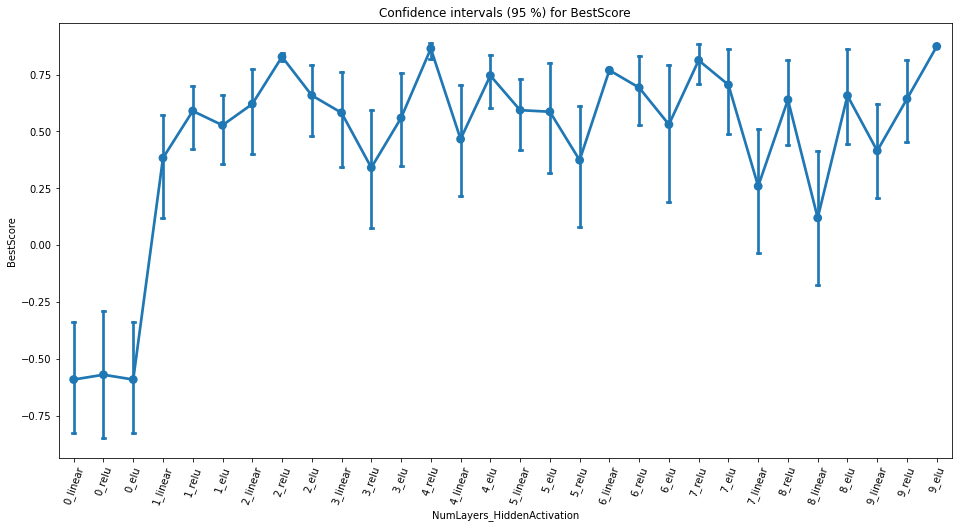

0_elu       21
0_linear    21
0_relu      19
1_elu       33
1_linear    27
1_relu      27
2_elu       30
2_linear    24
2_relu      45
3_elu       35
3_linear    29
3_relu      34
4_elu       31
4_linear    29
4_relu      40
5_elu       27
5_linear    40
5_relu      31
6_elu       22
6_linear    30
6_relu      48
7_elu       35
7_linear    35
7_relu      30
8_elu       27
8_linear    30
8_relu      43
9_elu       25
9_linear    35
9_relu      40
Name: NumLayers_HiddenActivation, dtype: int64


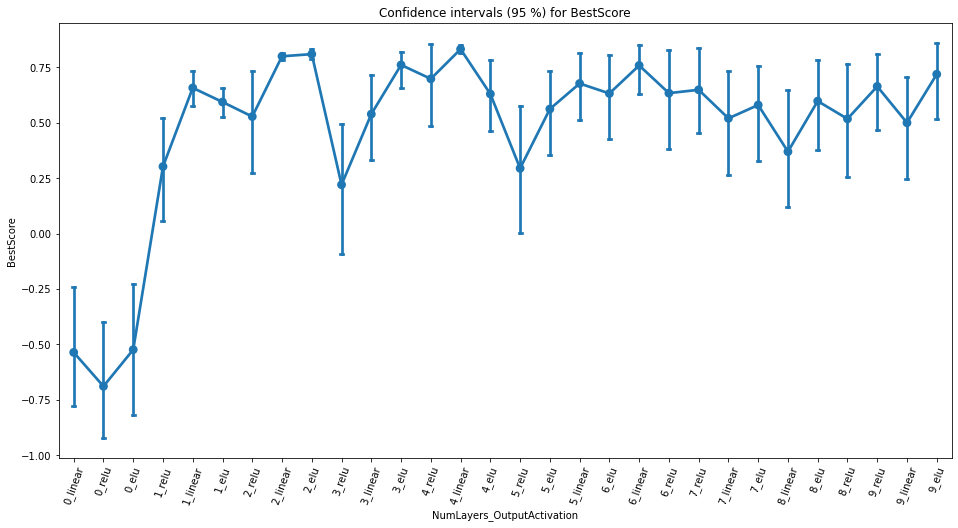

0_elu       18
0_linear    22
0_relu      21
1_elu       29
1_linear    25
1_relu      33
2_elu       30
2_linear    41
2_relu      28
3_elu       27
3_linear    37
3_relu      34
4_elu       43
4_linear    32
4_relu      25
5_elu       36
5_linear    33
5_relu      29
6_elu       35
6_linear    37
6_relu      28
7_elu       39
7_linear    32
7_relu      29
8_elu       33
8_linear    38
8_relu      29
9_elu       28
9_linear    36
9_relu      36
Name: NumLayers_OutputActivation, dtype: int64


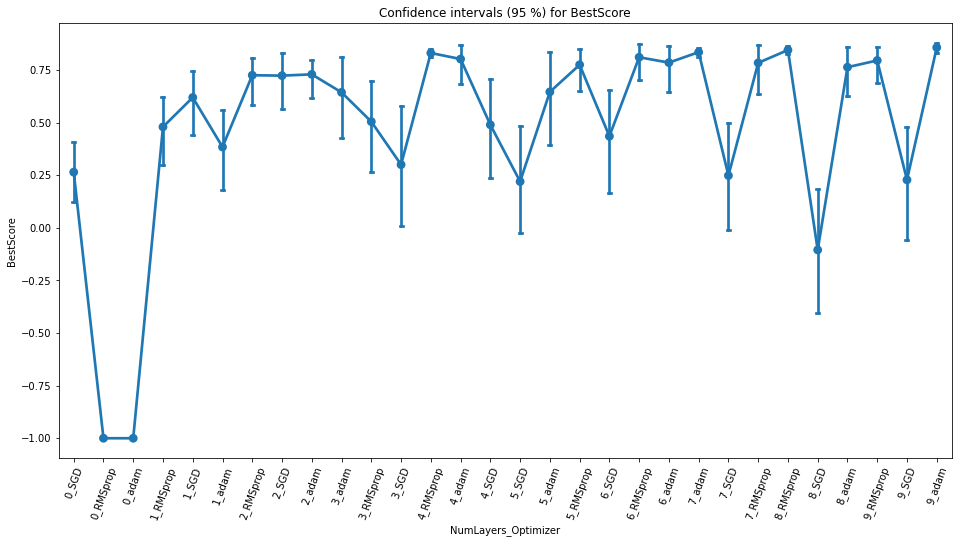

0_RMSprop    22
0_SGD        20
0_adam       19
1_RMSprop    28
1_SGD        32
1_adam       27
2_RMSprop    28
2_SGD        37
2_adam       34
3_RMSprop    37
3_SGD        29
3_adam       32
4_RMSprop    33
4_SGD        32
4_adam       35
5_RMSprop    31
5_SGD        38
5_adam       29
6_RMSprop    38
6_SGD        33
6_adam       29
7_RMSprop    27
7_SGD        41
7_adam       32
8_RMSprop    24
8_SGD        34
8_adam       42
9_RMSprop    37
9_SGD        34
9_adam       29
Name: NumLayers_Optimizer, dtype: int64


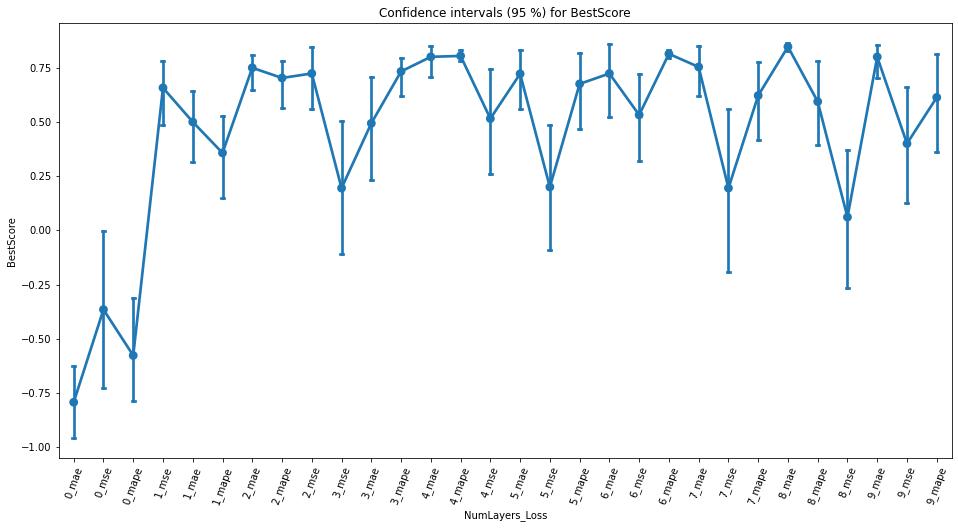

0_mae     20
0_mape    23
0_mse     18
1_mae     36
1_mape    26
1_mse     25
2_mae     37
2_mape    29
2_mse     33
3_mae     34
3_mape    35
3_mse     29
4_mae     45
4_mape    24
4_mse     31
5_mae     36
5_mape    27
5_mse     35
6_mae     29
6_mape    33
6_mse     38
7_mae     41
7_mape    37
7_mse     22
8_mae     28
8_mape    39
8_mse     33
9_mae     41
9_mape    27
9_mse     32
Name: NumLayers_Loss, dtype: int64


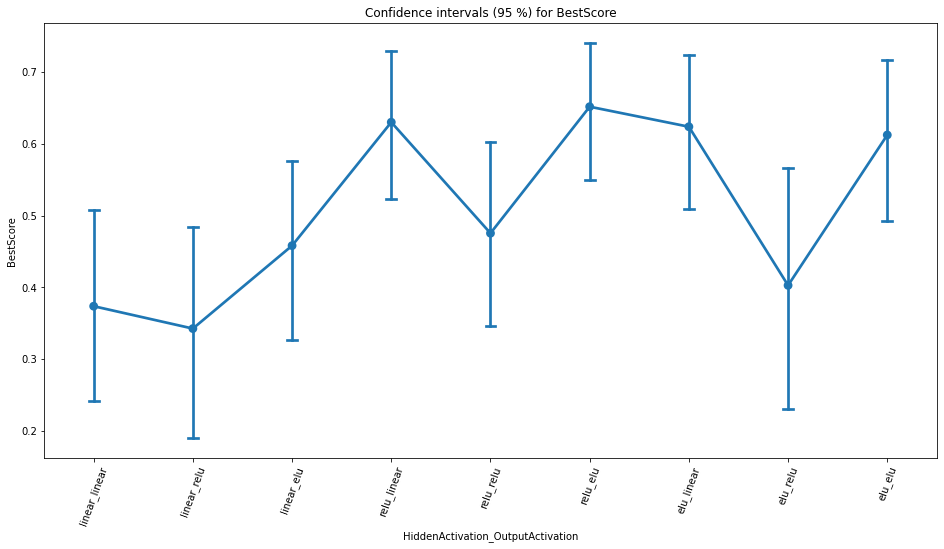

elu_elu           96
elu_linear       108
elu_relu          82
linear_elu        97
linear_linear    101
linear_relu      102
relu_elu         125
relu_linear      124
relu_relu        108
Name: HiddenActivation_OutputActivation, dtype: int64


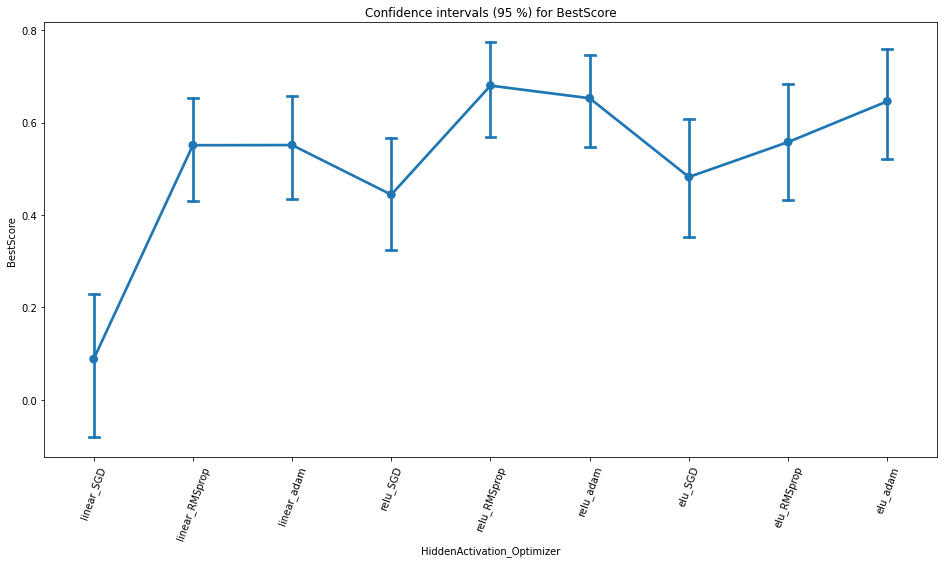

elu_RMSprop        95
elu_SGD           105
elu_adam           86
linear_RMSprop     94
linear_SGD        104
linear_adam       102
relu_RMSprop      116
relu_SGD          121
relu_adam         120
Name: HiddenActivation_Optimizer, dtype: int64


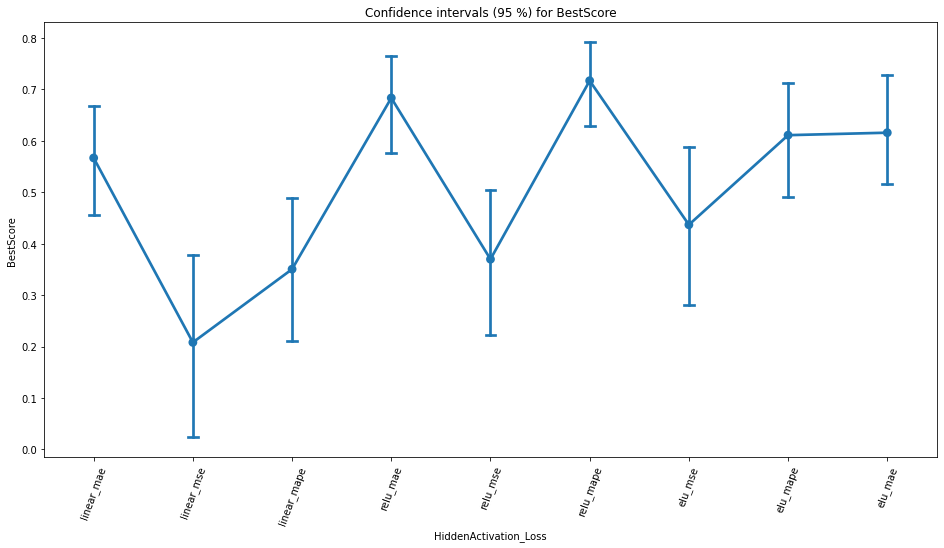

elu_mae        105
elu_mape        89
elu_mse         92
linear_mae     113
linear_mape    100
linear_mse      87
relu_mae       129
relu_mape      111
relu_mse       117
Name: HiddenActivation_Loss, dtype: int64


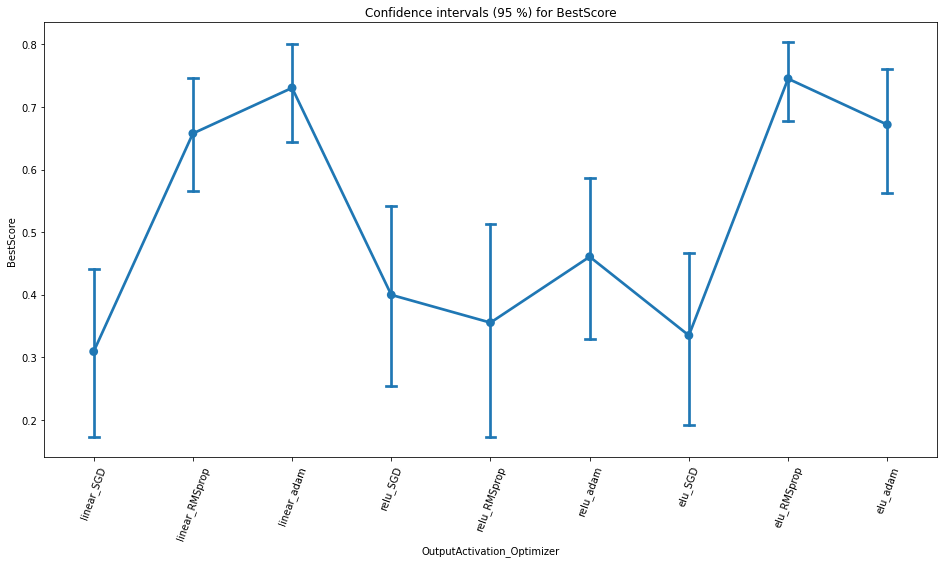

elu_RMSprop       111
elu_SGD           110
elu_adam           97
linear_RMSprop    106
linear_SGD        124
linear_adam       103
relu_RMSprop       88
relu_SGD           96
relu_adam         108
Name: OutputActivation_Optimizer, dtype: int64


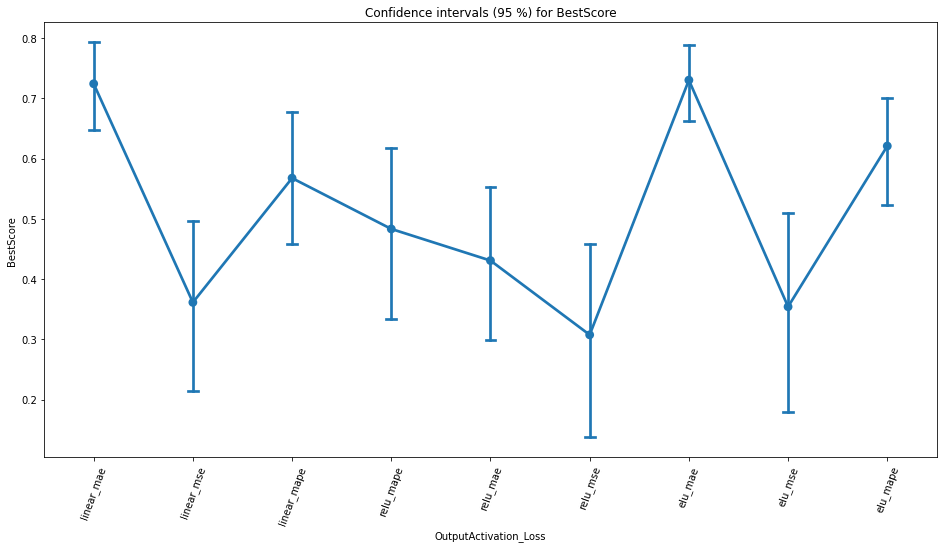

elu_mae        115
elu_mape       108
elu_mse         95
linear_mae     112
linear_mape    108
linear_mse     113
relu_mae       120
relu_mape       84
relu_mse        88
Name: OutputActivation_Loss, dtype: int64


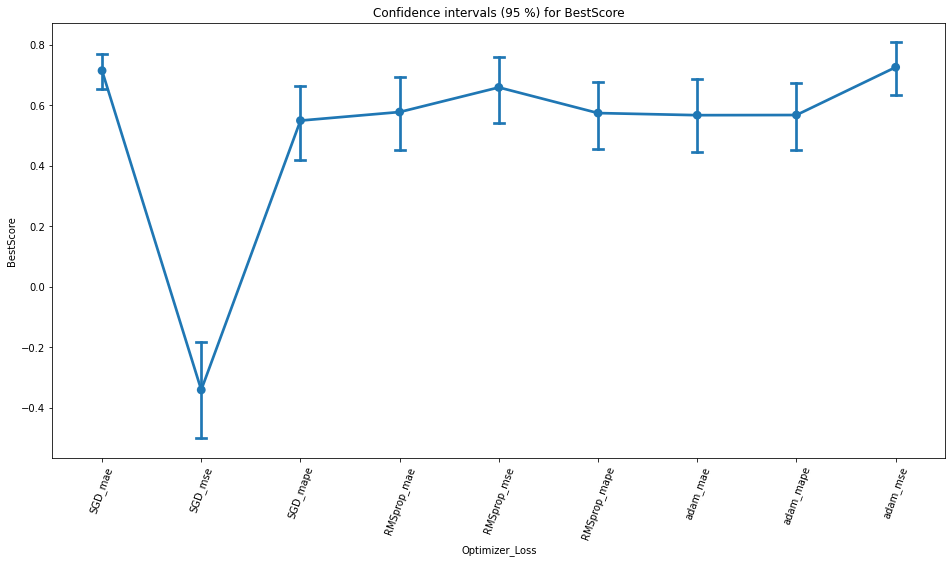

RMSprop_mae     111
RMSprop_mape     96
RMSprop_mse      98
SGD_mae         129
SGD_mape        101
SGD_mse         100
adam_mae        107
adam_mape       103
adam_mse         98
Name: Optimizer_Loss, dtype: int64


In [116]:
for feature in new_features:
    show_pointplot(feature, 'BestScore', results_df)
    print(results_df[feature].value_counts().sort_index())

Введем новый категориальный признак. 

Признак будет иметь 3 категории: 
* 'neg' - отрицательное значение метрики;
* 'pos' - положительное значение метрики;
* 'high' - высокое значение метрики (возьмем 90 перцентиль).

In [117]:
def f(x, perc):
    if x < 0:
        return 'neg'
    elif 0 <= x < perc:
        return 'pos'
    else:
        return 'high'

In [118]:
perc_90 = results_df['BestScore'].quantile(0.9)

results_df['MetricCategory'] = results_df['BestScore'].apply(lambda x: f(x, perc_90))

In [119]:
results_df.head(5)

,NumLayers,ParamLayers,HiddenActivation,OutputActivation,Optimizer,Loss,TotalParams,BestEpoch,BestScore,NumLayers_HiddenActivation,NumLayers_OutputActivation,NumLayers_Optimizer,NumLayers_Loss,HiddenActivation_OutputActivation,HiddenActivation_Optimizer,HiddenActivation_Loss,OutputActivation_Optimizer,OutputActivation_Loss,Optimizer_Loss,MetricCategory
0,0,(),linear,linear,SGD,mae,14,100,-0.1702,0_linear,0_linear,0_SGD,0_mae,linear_linear,linear_SGD,linear_mae,linear_SGD,linear_mae,SGD_mae,neg
1,0,(),linear,linear,SGD,mse,14,100,0.6321,0_linear,0_linear,0_SGD,0_mse,linear_linear,linear_SGD,linear_mse,linear_SGD,linear_mse,SGD_mse,pos
2,0,(),linear,linear,SGD,mape,14,100,0.2162,0_linear,0_linear,0_SGD,0_mape,linear_linear,linear_SGD,linear_mape,linear_SGD,linear_mape,SGD_mape,pos
3,0,(),linear,linear,RMSprop,mae,14,100,-1.0000,0_linear,0_linear,0_RMSprop,0_mae,linear_linear,linear_RMSprop,linear_mae,linear_RMSprop,linear_mae,RMSprop_mae,neg
4,0,(),linear,linear,RMSprop,mse,14,100,-1.0000,0_linear,0_linear,0_RMSprop,0_mse,linear_linear,linear_RMSprop,linear_mse,linear_RMSprop,linear_mse,RMSprop_mse,neg


In [120]:
def show_countplot(x, hue, data, title=None, figsize=(16, 8)):
    plt.figure(figsize=figsize)

    sns.countplot(x=x, hue=hue, data=data)
    plt.title(f'{x} grouped by {hue}')
    plt.legend(title=title, loc='upper right')
    plt.xticks(rotation=70)

    plt.show()

In [121]:
categorical += new_features

categorical

['NumLayers',
 'HiddenActivation',
 'OutputActivation',
 'Optimizer',
 'Loss',
 'NumLayers_HiddenActivation',
 'NumLayers_OutputActivation',
 'NumLayers_Optimizer',
 'NumLayers_Loss',
 'HiddenActivation_OutputActivation',
 'HiddenActivation_Optimizer',
 'HiddenActivation_Loss',
 'OutputActivation_Optimizer',
 'OutputActivation_Loss',
 'Optimizer_Loss']

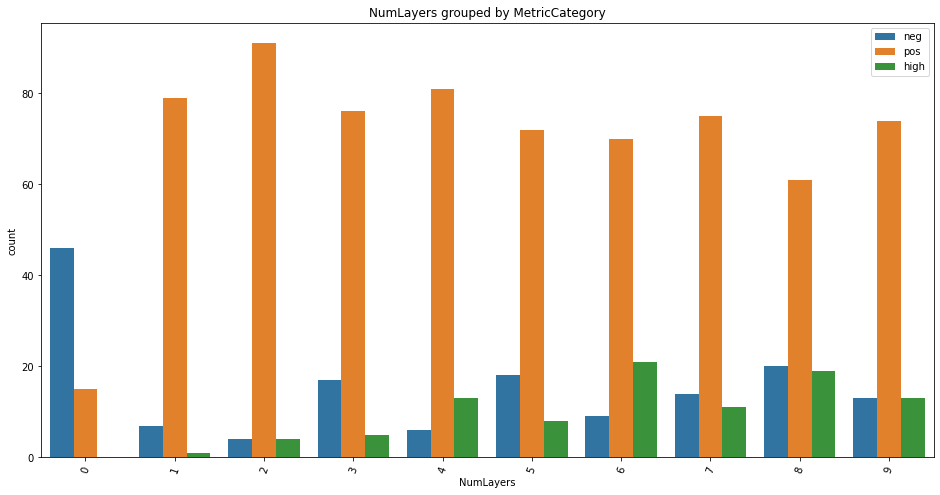

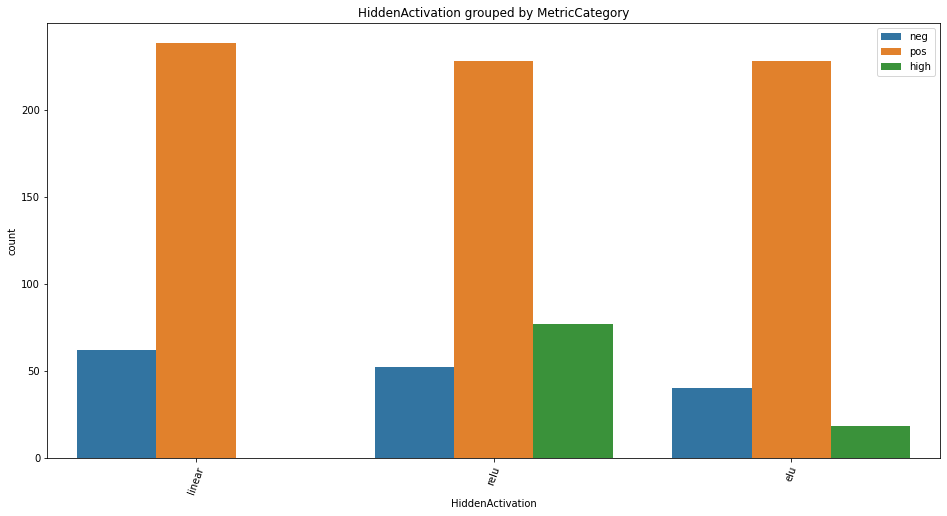

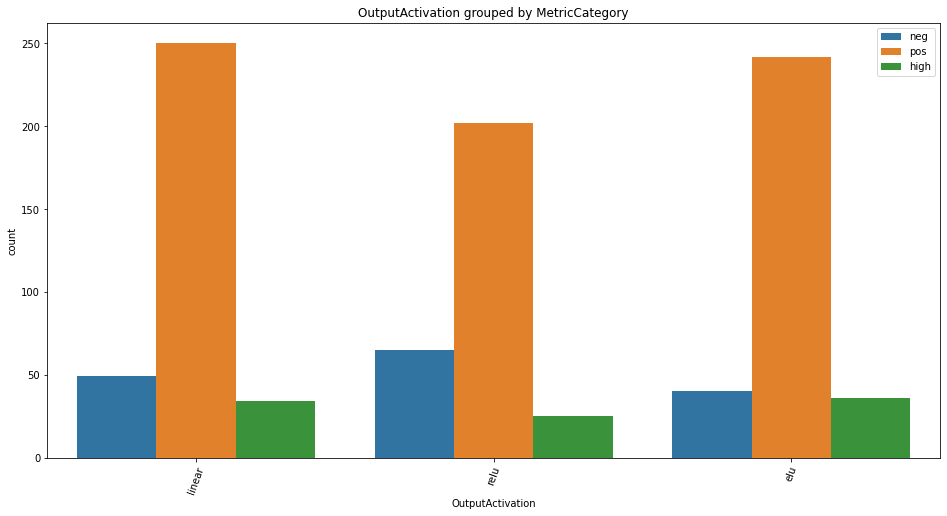

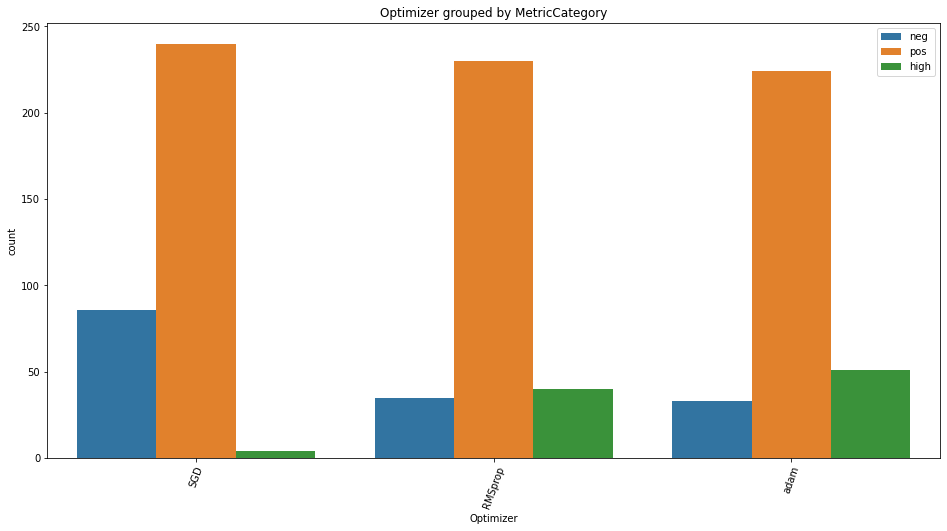

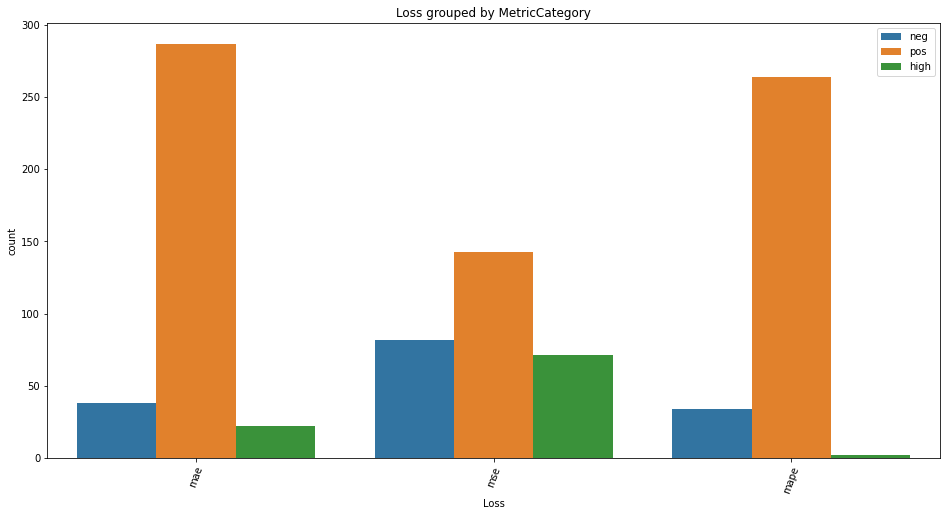

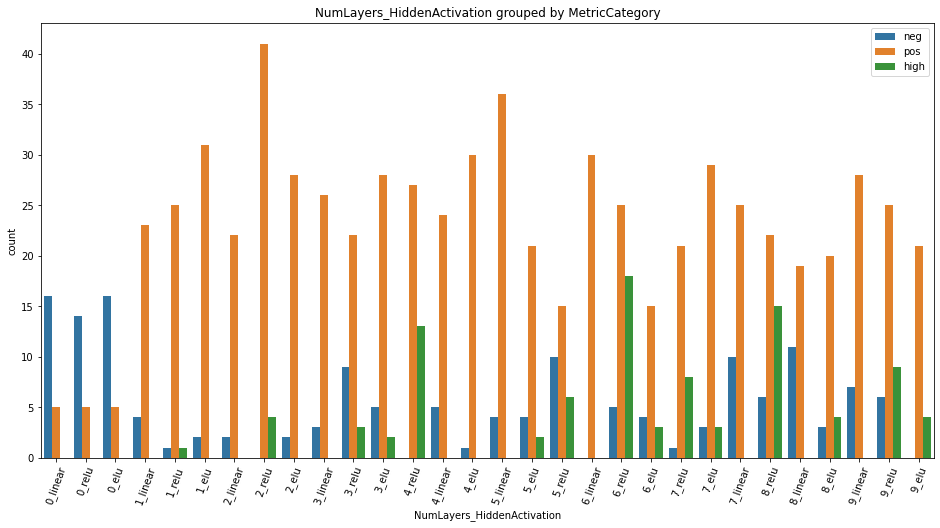

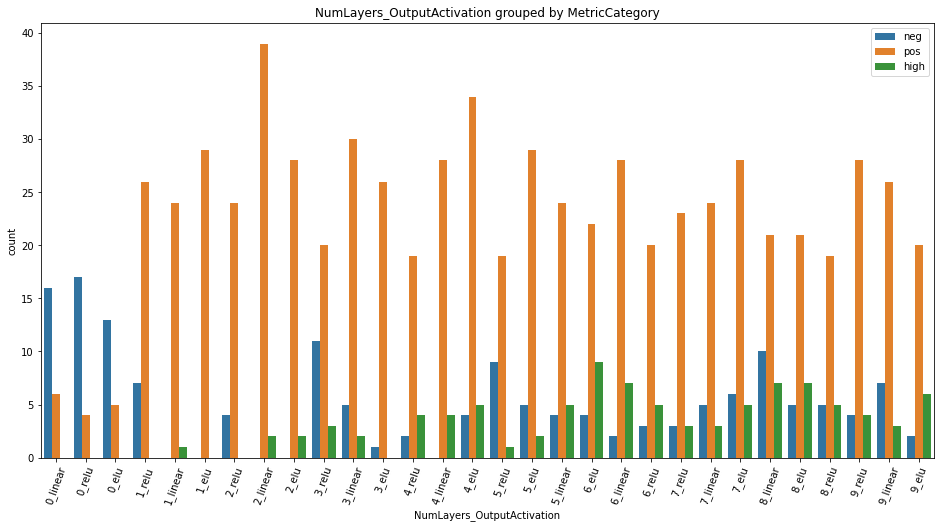

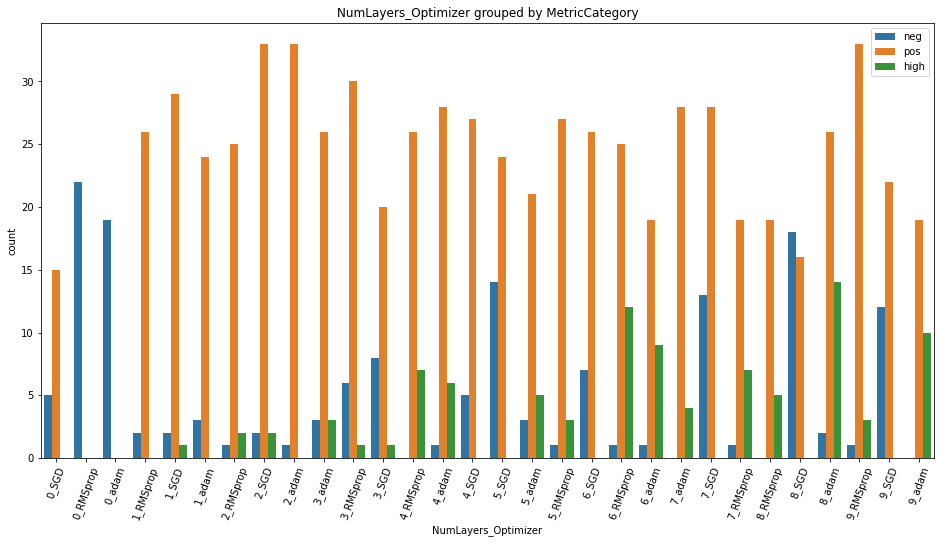

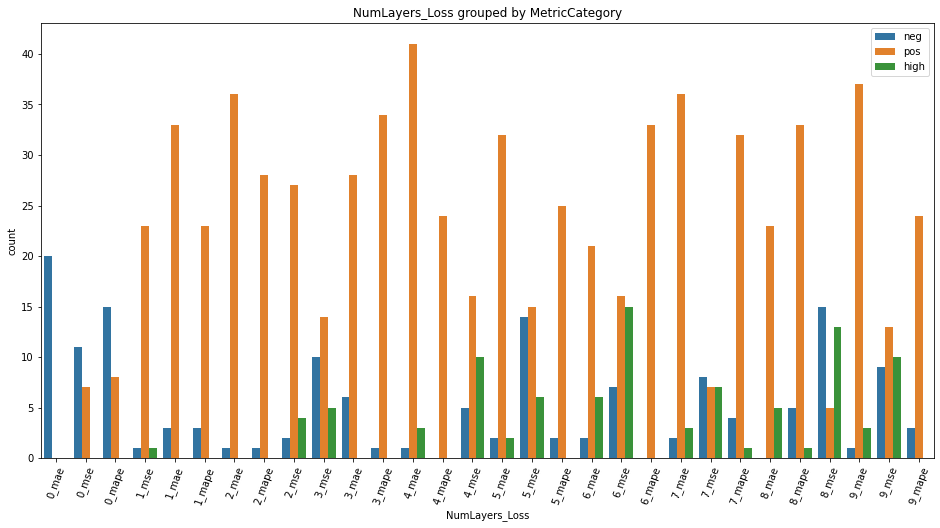

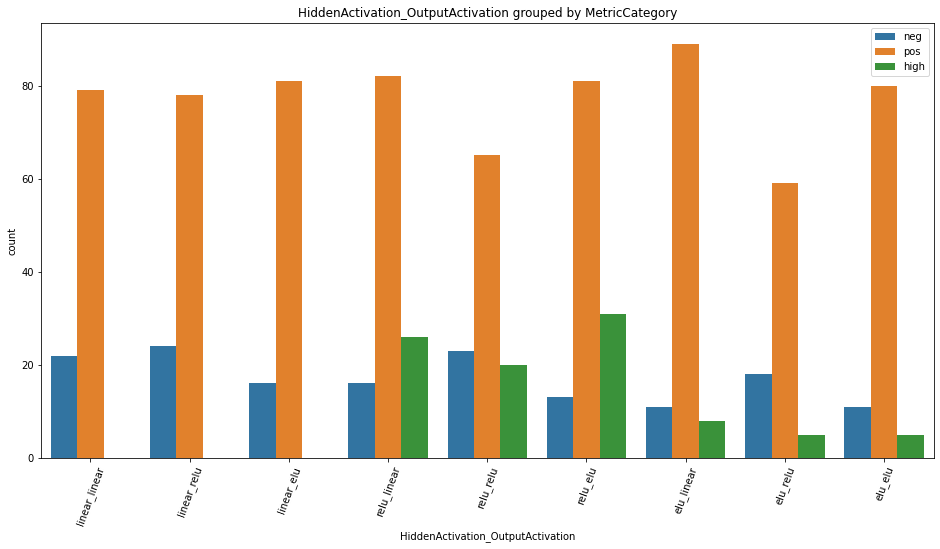

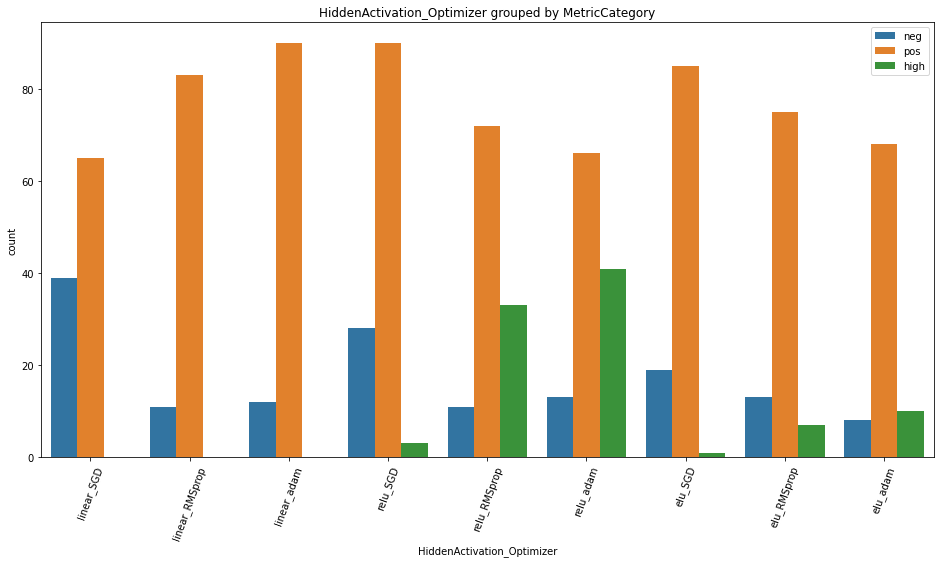

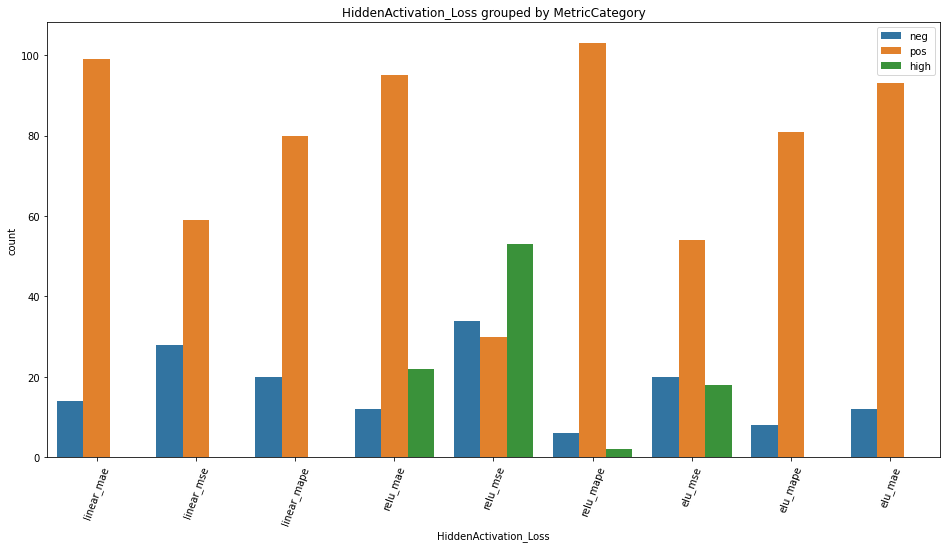

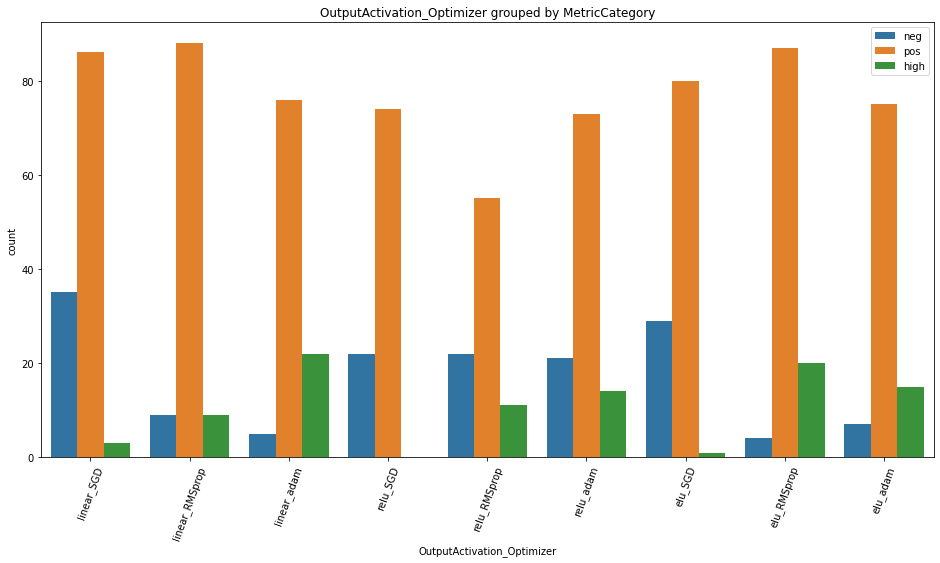

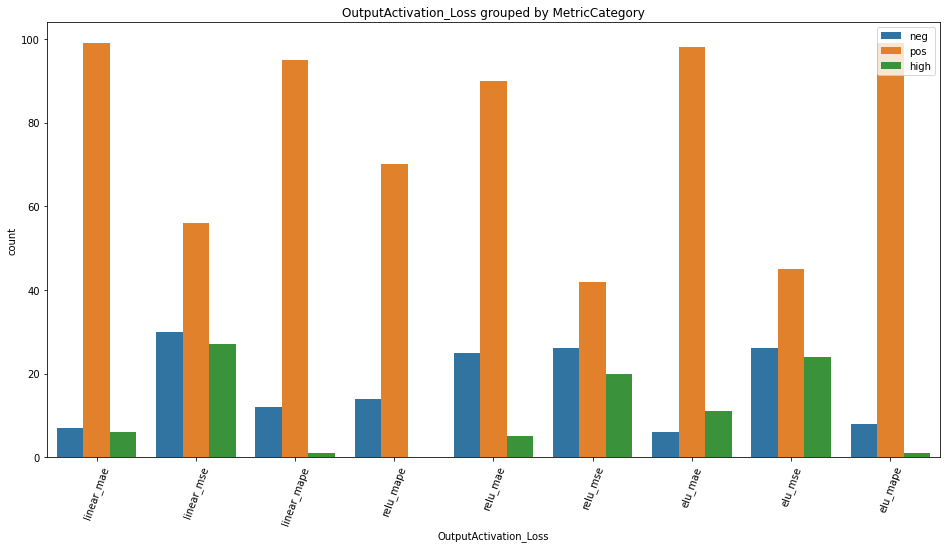

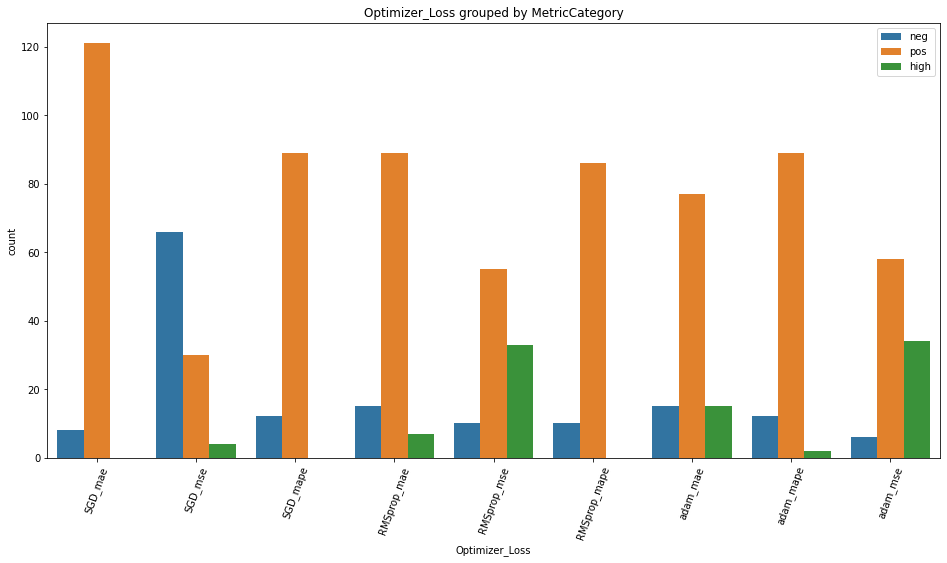

In [122]:
for cat in categorical:
    show_countplot(cat, 'MetricCategory', results_df)

**Количество слоев (NumLayers).**
Наблюдается зависимость частот категорий от количества слоев. 
При количестве скрытых слоев равном 0 - чаще появляется категория 'neg' (отрицательное значение метрики), уже начиная с 1 скрытого слоя ситуация меняется в лучшую сторону - появляются высокие значения метрики. В целом наблюдается небольшая положительная корреляция между количеством слоев и количеством наблюдений с меткой 'high' - высокое значение метрики, но вместе с тем наблюдается увеличение количества наблюдений с меткой 'neg' - отрицательное значение метрики. Лучшие соотношения меток при 4 и 6 слоях.

**Функция активации для скрытых слоев (HiddenActivation).**
В качестве ф-ции активации для скрытых слоев лучшим образом показывает 'relu'.

**Функция активации для выходного слоя (OutputActivation).**
В качестве ф-ции активации для выходного слоя 'relu' показывает себя не лучшим образом - значительная доля меток 'neg'. По соотношениям меток лучше показала себя 'elu'.

**Оптимизатор (Optimizer).**
Хорошие соотношения меток при оптимизаторах 'adam' и 'RMSprop', у 'adam' чаще встречаются метки 'high'. 'SGD' - показывает себя хуже всех.

**Функция потерь (Loss).**
Чаще всего метка 'high' встречается при использовании ф-ции потерь 'mse', но также значительно чаще встречается метка 'neg'. По соотношению 'high' к 'neg' похоже все-таки выигрывает 'mse'.

**Количество слоев и ф-ция активации в скрытых слоях (NumLayers_HiddenActivation).**
Сочетание 4 скрытых слоев и 'relu' в кач-ве ф-ции активации в скрытых слоях - показывает наилучшее соотношение меток - отсутствуют метки 'neg'. Также неплохо показало сочетание 6 скрытых слоев и 'relu' - больше меток 'high'.

**Количество слоев и ф-ция активации в выходном слое (NumLayers_OutputActivation).**
Сочетание 6 скрытых слоев и 'elu' в кач-ве ф-ции активации в выходном слое - показывает наилучшее соотношение меток. 'relu' на выходном слое показывает себя хуже (при 6 скрытых слоях).

**Количество слоев и оптимизатор (NumLayers_Optimizer).**
Хорошие сочетания 6_RMSprop, 6_adam, 8_adam, 9_adam.

**Количество слоев и ф-ция потерь (NumLayers_Loss).**
Больше меток 'high' при сочетаниях ф-ции потерь 'mse' и 6, 8 скрытых слоев. Но при 'mse' также больше меток 'neg'. При других ф-циях потерь метка 'high' встречается значительно реже.

**Функция активации в скрытых слоях и функция активации в выходном слое (HiddenActivation_OutputActivation).**
Хорошее соотношение меток при сочетании функции активации скрытых слоев и функции активации выходного слоя relu-elu. То есть при использовании в скрытых слоях relu, а в выходном elu. При relu-relu чаще встречаются метки 'neg'.

**Функция активации в скрытых слоях и оптимизатор (HiddenActivation_Optimizer).**
Лучшее соотношение при сочетании 'relu' (hidden) и 'adam'.

**Функция активации в скрытых слоях и функция потерь (HiddenActivation_Loss).**
Больше меток 'high' при сочетании 'relu' (hidden) и 'mse'. Также при этом сочетании значительное количество меток 'neg'.

**Функция активации в выходном слое и оптимизатор (OutputActivation_Optimizer).**
Лучшее соотношение меток при сочетании 'linear' (output) и 'adam'.

**Функция активации в выходном слое и функция потерь (OutputActivation_Loss).**
Больше меток 'high' при сочетании 'linear' (output) и 'mse'. Также при этом сочетании значительное количество меток 'neg'.

**Оптимизатор и функция потерь (Optimizer_Loss).**
Хорошее соотношение меток при сочетании 'adam' и 'mse'. Ожидаемо наихудшее сочетание 'SGD' и 'mse', вероятно это связано с тем, что производная от 'mse' при сильных отклонениях предикта от истинного значения принимает большие значения. И сочетание с 'SGD' (где lr в течении обучения практически никак не меняется) приводит к слишком большим 'скачкам', которые могут приводить либо к 'параличу сети' (при отрицательном выходе сумматора, где производные функций активации становятся равными нулю), либо непосредственно к 'взрыву градиента' (еще бОльшим шагам).

Попробуем построить лучшую модель на основании полученной информации. 

* Количество слоев - хорошие показатели чаще при 6 слоях;
* Функция активации в скрытых слоях - лучшие показатели при 'relu';
* Функция активации в выходном слое - чаще более хорошие показатели без ф-ции активации ('linear');
* Функция потерь - с функцией 'mse' и хорошим оптимизатором чаще удается достигать более высокие метрики;
* Оптимизатор - лучшие результаты чаще показывает 'adam'.

Количество нейронов в слоях - попробуем подобрать как гиперпараметр. Не будем рассматривать сочетания различных значений на разных слоях.

In [83]:
%%time
n_neurons_metric = {}

for n in n_neurons:
    inputs = Input(shape=X_train.shape[1])

    l = Dense(n, activation='relu')(inputs)
    l = Dense(n, activation='relu')(l)
    l = Dense(n, activation='relu')(l)
    l = Dense(n, activation='relu')(l)
    l = Dense(n, activation='relu')(l)
    l = Dense(n, activation='relu')(l)
    outputs = Dense(1, activation='linear')(l)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse', metrics=[r2_metric])
    
    history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=100, 
                    verbose=0, 
                    validation_data=(X_test_scaled, y_test))
    
    n_neurons_metric[(f'{n} neurons', 'train')] = history.history['r2_metric']
    n_neurons_metric[(f'{n} neurons', 'valid')] = history.history['val_r2_metric']

CPU times: user 49.6 s, sys: 2.95 s, total: 52.5 s
Wall time: 40.2 s


In [123]:
pd.DataFrame(n_neurons_metric).tail(10)

16 neurons           32 neurons           64 neurons           128 neurons  \
        train     valid      train     valid      train     valid       train   
90   0.807267  0.880347   0.842000  0.888439   0.927050  0.914314    0.944211   
91   0.794000  0.882632   0.840285  0.899796   0.926852  0.912751    0.946185   
92   0.816391  0.875170   0.854422  0.898310   0.924074  0.911643    0.938970   
93   0.795579  0.876587   0.845462  0.891755   0.916410  0.914160    0.932935   
94   0.794898  0.884264   0.838994  0.899307   0.925385  0.871598    0.932366   
95   0.798162  0.878985   0.849975  0.901864   0.921518  0.917274    0.944051   
96   0.790447  0.879716   0.838049  0.903392   0.926241  0.908433    0.942772   
97   0.816126  0.882340   0.855987  0.890600   0.928953  0.914743    0.950203   
98   0.785079  0.881823   0.836446  0.898527   0.927757  0.896801    0.949281   
99   0.805244  0.882083   0.847735  0.902868   0.925485  0.913495    0.951902   

             256 neurons            
       valid       train     valid  
90  0.919863    0.956401  0.929694  
91  0.914461    0.959059  0.927700  
92  0.904746    0.947211  0.932914  
93  0.868392    0.957757  0.925997  
94  0.914183    0.957242  0.917541  
95  0.920618    0.954010  0.933600  
96  0.911750    0.962894  0.927461  
97  0.913647    0.951252  0.924239  
98  0.916833    0.950867  0.926033  
99  0.924184    0.953751  0.935254

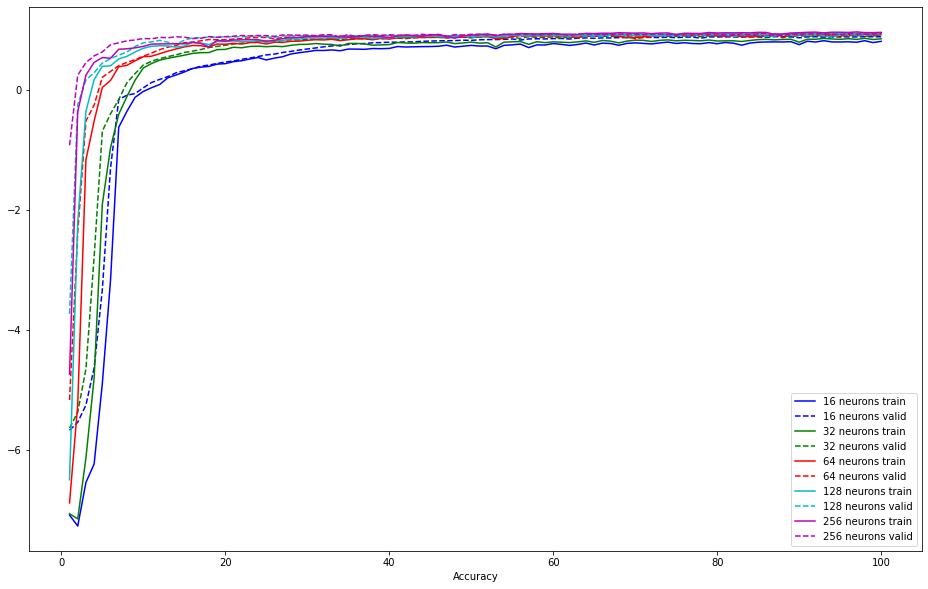

In [100]:
neurons_colors = {
    '16 neurons': 'b', 
    '32 neurons': 'g', 
    '64 neurons': 'r',
    '128 neurons': 'c', 
    '256 neurons': 'm'
}


plt.figure(figsize=(16, 10))
for n_num, color in neurons_colors.items():
    plt.plot(range(1, 101), n_neurons_metric[(n_num, 'train')], linestyle='-', c=color, label=f'{n_num} train')
    plt.plot(range(1, 101), n_neurons_metric[(n_num, 'valid')], linestyle='--', c=color, label=f'{n_num} valid')

plt.xlabel('Epochs')
plt.xlabel('Accuracy')
plt.legend()
plt.show()

Больше нейронов - лучше метрика. Построим итоговую модель.

In [94]:
inputs = Input(shape=X_train.shape[1])

l = Dense(256, activation='relu')(inputs)
l = Dense(256, activation='relu')(l)
l = Dense(256, activation='relu')(l)
l = Dense(256, activation='relu')(l)
l = Dense(256, activation='relu')(l)
l = Dense(256, activation='relu')(l)
outputs = Dense(1, activation='linear')(l)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse', metrics=[r2_metric])

history = model.fit(X_train_scaled, 
                y_train, 
                epochs=100, 
                verbose=1, 
                validation_data=(X_test_scaled, y_test))

Epoch 1/100
12/12 [==============================] - 0s 14ms/step - loss: 414.9634 - r2_metric: -4.9020 - val_loss: 184.4756 - val_r2_metric: -0.8813
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 108.3915 - r2_metric: -0.3608 - val_loss: 70.2934 - val_r2_metric: 0.2687
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 55.6468 - r2_metric: 0.2774 - val_loss: 50.8613 - val_r2_metric: 0.4453
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 41.1277 - r2_metric: 0.4808 - val_loss: 39.1430 - val_r2_metric: 0.5750
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 32.9744 - r2_metric: 0.5813 - val_loss: 31.5933 - val_r2_metric: 0.6549
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 30.2154 - r2_metric: 0.5594 - val_loss: 21.0227 - val_r2_metric: 0.7812
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 25.4742 - r2_metric: 0.6782 - val_loss: 23.6729 - 

**Результаты**

Удалось достичь довольно высокого значения метрики на отложенной выборке (около 0.94 r2).